# 코로나 데이터 처리 및 분석

---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 코로나 데이터 설명 및 구조

### Case Data
- **Case**: Data of COVID-19 infection cases in South Korea

### Patient Data
- **PatientInfo**: Epidemiological data of COVID-19 patients in South Korea
- **PatientRoute**: Route data of COVID-19 patients in South Korea (currently unavailable)

### Time Series Data
- **Time**: Time series data of COVID-19 status in South Korea
- **TimeAge**: Time series data of COVID-19 status in terms of the age in South Korea
- **TimeGender**: Time series data of COVID-19 status in terms of gender in South Korea
- **TimeProvince**: Time series data of COVID-19 status in terms of the Province in South Korea

### Additional Data
- **Region**: Location and statistical data of the regions in South Korea
- **Weather**: Data of the weather in the regions of South Korea
- **SearchTrend**: Trend data of the keywords searched in NAVER which is one of the largest portals in South Korea
- **SeoulFloating**: Data of floating population in Seoul, South Korea (from SK Telecom Big Data Hub)
- **Policy**: Data of the government policy for COVID-19 in South Korea

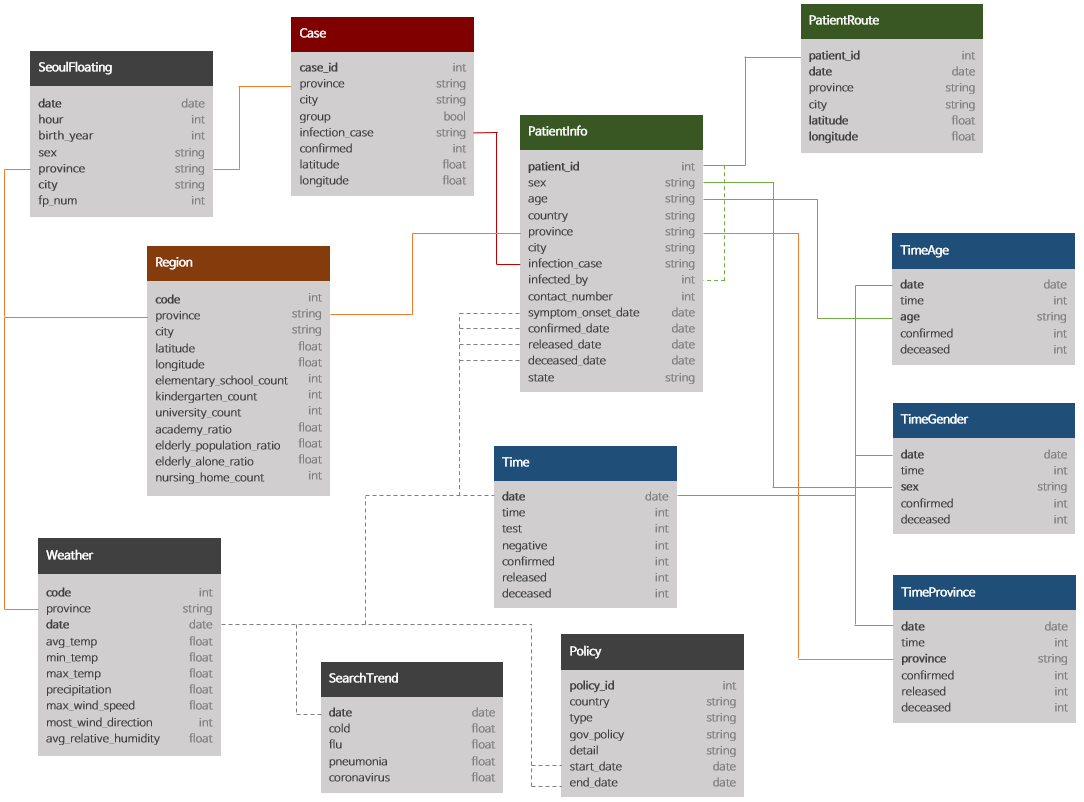

## PatientInfo 데이터 분석 및 시각화

대한민국의 COVID-19 환자 역학 자료

https://drive.google.com/file/d/1lxVfvxoHQKUfbtv4_I24eImThtCdnDod/view?usp=drive_link

- patient_id: 환자의 ID
  > - patient_id(10) = region_code(5) + patient_number(5)
  > - region_code는 'Region.csv' 파일에서 확인 가능
  > - patient_number는 두 가지 유형 존재
      - local_num: 지방 정부가 부여한 번호
      - global_num: KCDC가 부여한 번호
- sex: 환자의 성별
- age: 환자의 연령
  > - 0s: 0 ~ 9  
  > - 10s: 10 ~ 19  
  ...  
  > - 90s: 90 ~ 99  
  > - 100s: 100 ~ 109
- country: 환자의 국가
- province: 환자의 도
- city: 환자의 도시
- infection_case: 감염 사례
- infected_by: 환자를 감염시킨 사람의 ID
  > - 'patient_id'열을 참조
- contact_number: 접촉한 사람의 수
- symptom_onset_date: 증상 시작 날짜
- confirmed_date: 확진 날짜
- released_date: 격리해제 날짜
- deceased_date: 사망 날짜
- state: isolated / released / deceased
  > - isolated: 병원에서 격리
  > - released: 병원에서 격리해제 후 퇴원
  > - deceased: 사망

In [3]:
df_pinfo = pd.read_csv('PatientInfo.csv')
df_pinfo.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [4]:
df_pinfo['state'].value_counts()

released    2929
isolated    2158
deceased      78
Name: state, dtype: int64

In [5]:
df_pinfo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


In [7]:
column = ['sex', 'age', 'country', 'province', 'city', 'infection_case', 'state']
for col in column:
    print(df_pinfo[col].value_counts())
    print('\n')


female    2218
male      1825
Name: sex, dtype: int64


20s     899
50s     667
30s     523
40s     518
60s     482
70s     232
10s     178
80s     170
0s       66
90s      49
100s      1
Name: age, dtype: int64


Korea             5123
China               11
Foreign              7
United States        6
Bangladesh           5
Thailand             2
Indonesia            2
France               1
Canada               1
India                1
Switzerland          1
Germany              1
Vietnam              1
Mongolia             1
United Kingdom       1
Spain                1
Name: country, dtype: int64


Seoul                1312
Gyeongsangbuk-do     1254
Gyeonggi-do          1208
Incheon               343
Chungcheongnam-do     168
Busan                 151
Daegu                 137
Gyeongsangnam-do      133
Daejeon               119
Gangwon-do             63
Chungcheongbuk-do      56
Ulsan                  55
Sejong                 51
Gwangju                44
Jeollabuk-do           2

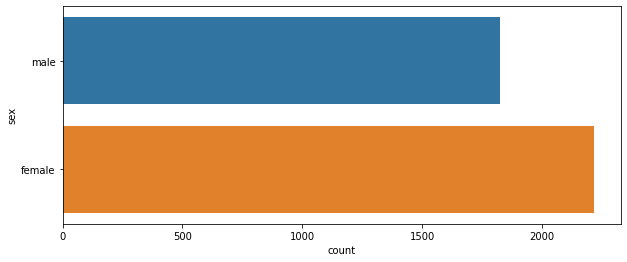

In [6]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df_pinfo, y='sex');

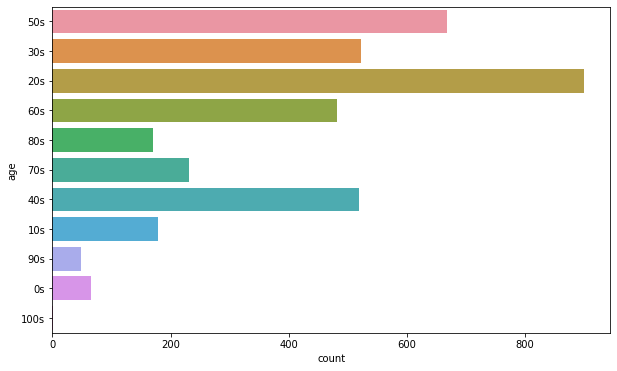

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pinfo, y='age');

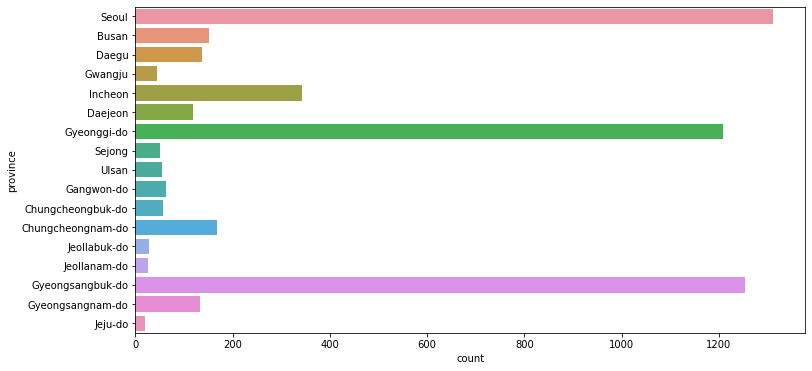

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_pinfo, y='province');

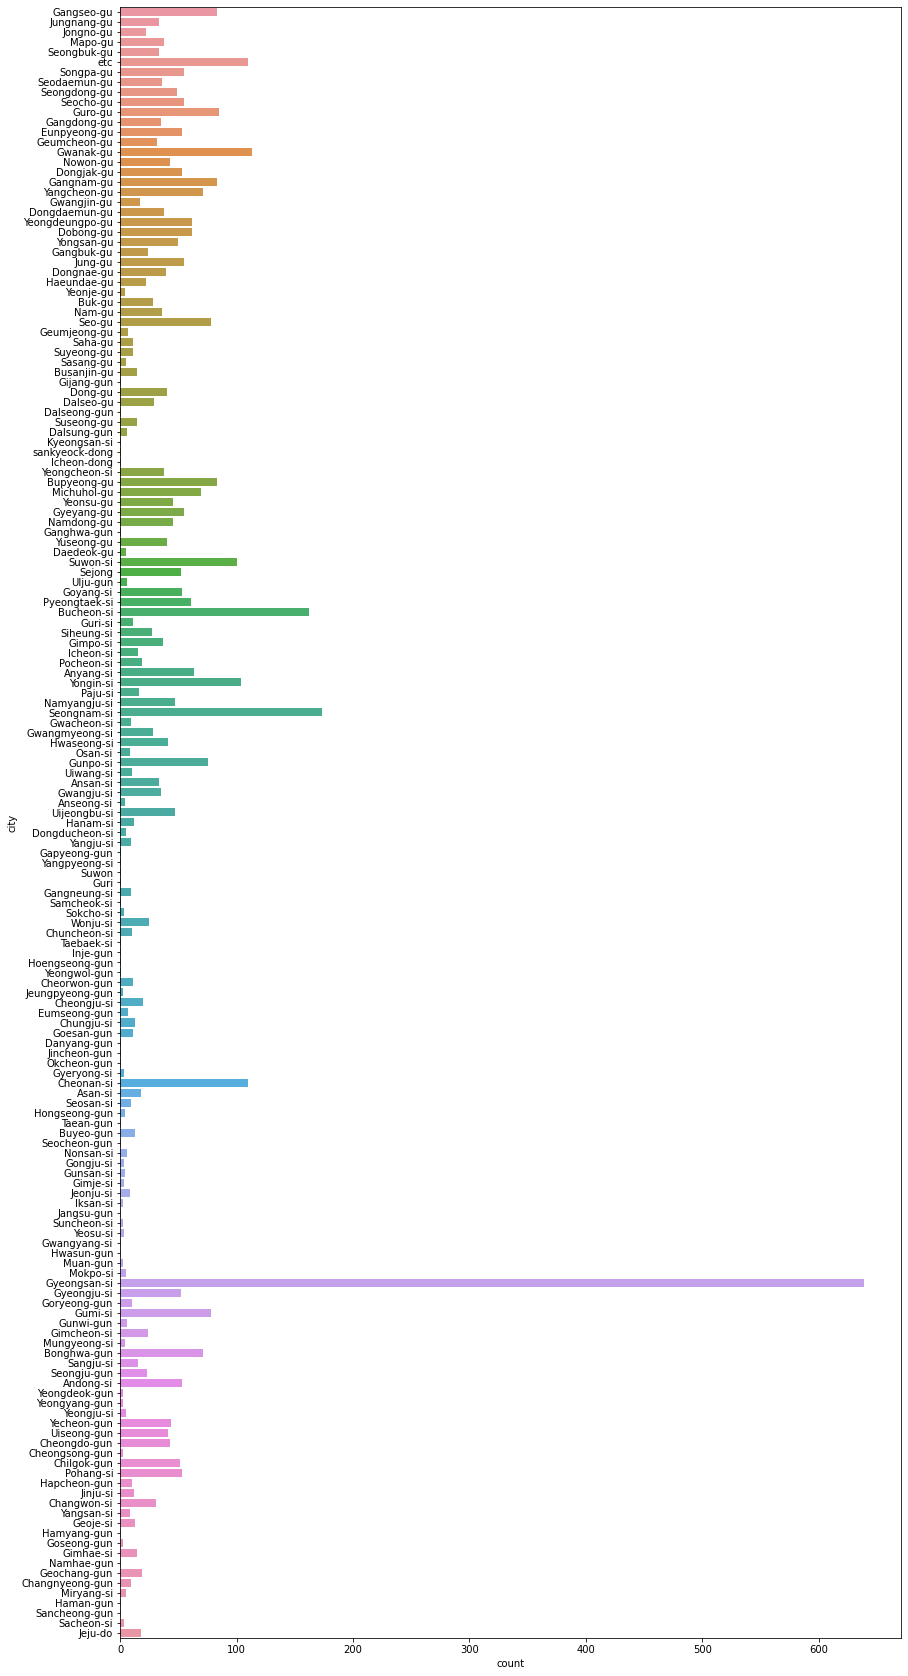

In [10]:
plt.figure(figsize=(14, 30))
sns.countplot(data=df_pinfo, y='city');

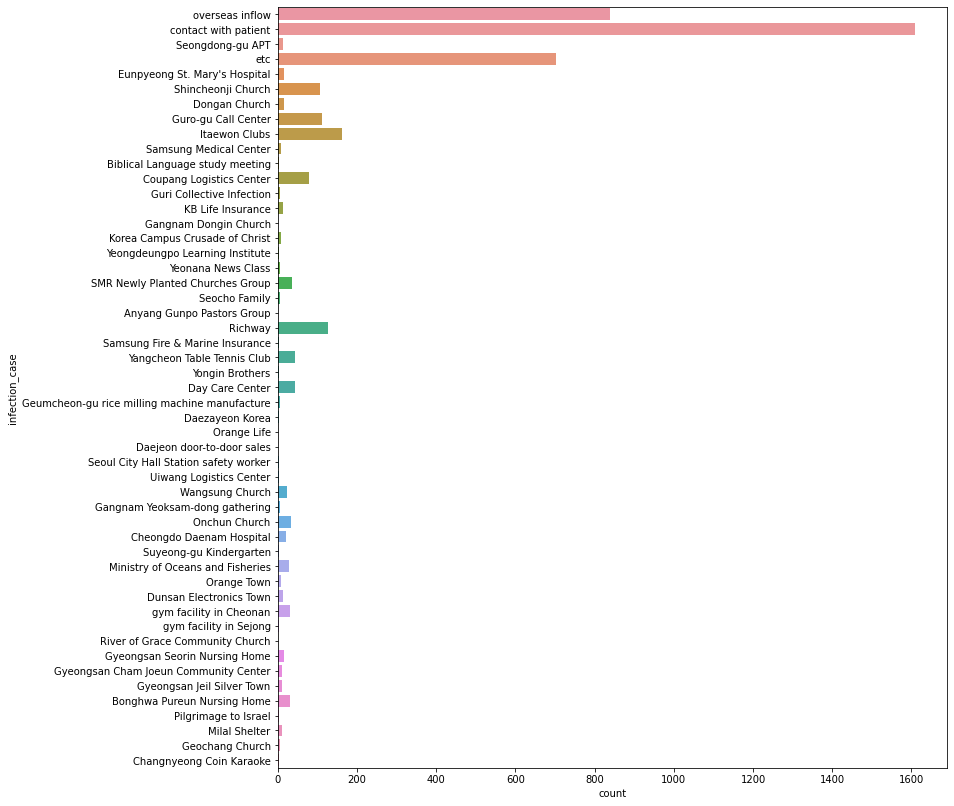

In [11]:
plt.figure(figsize=(12, 14))
sns.countplot(data=df_pinfo, y='infection_case');


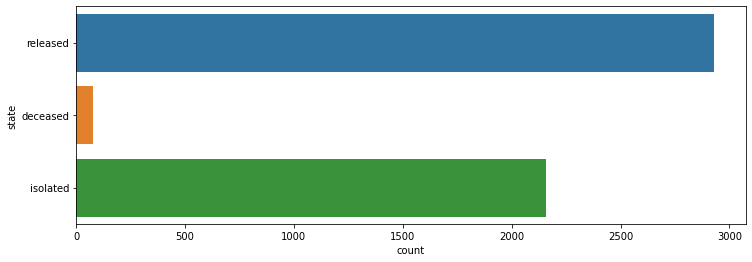

In [12]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df_pinfo, y='state');

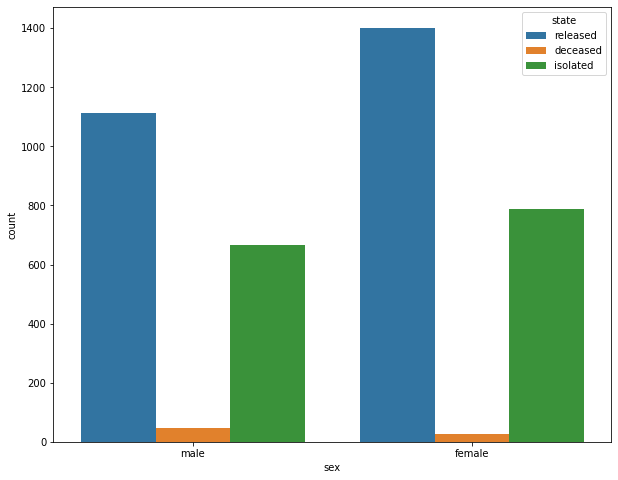

In [13]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_pinfo, x='sex', hue='state');

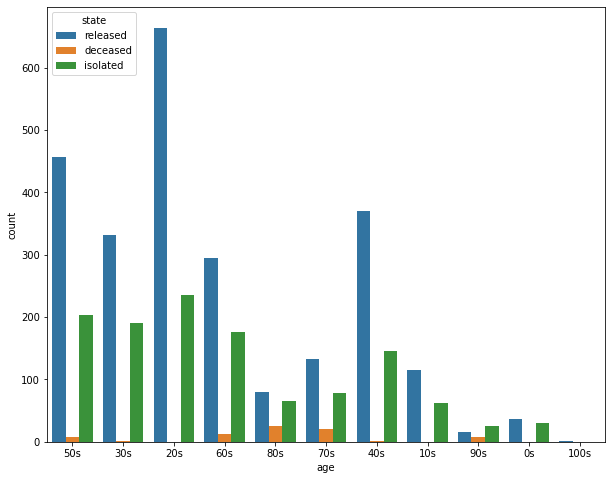

In [14]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_pinfo, x='age', hue='state');

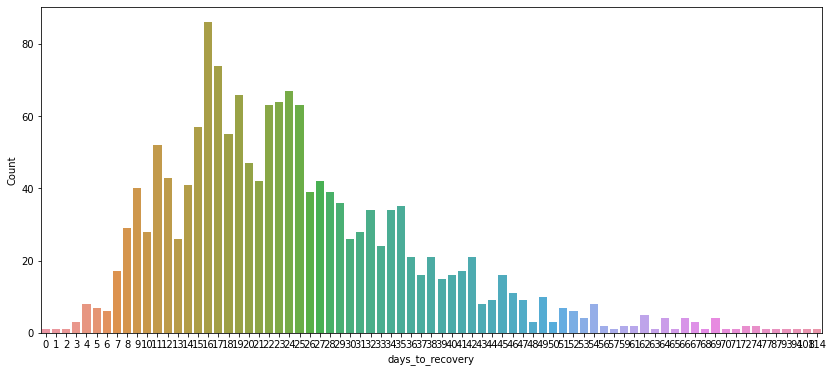

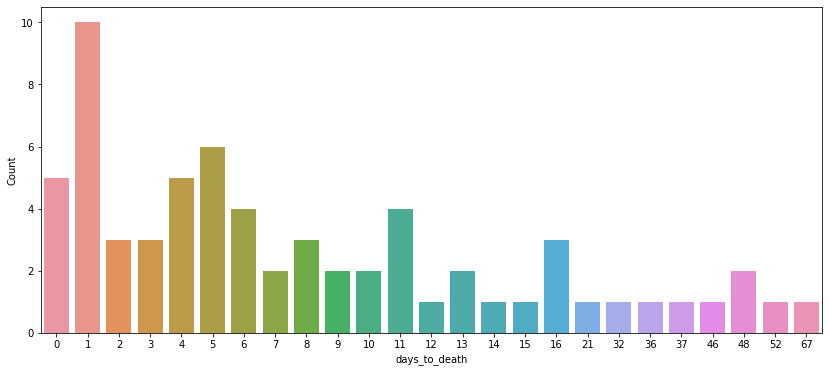

In [16]:
# Parsing dates
import datetime as dt
df_pinfo.confirmed_date = pd.to_datetime(df_pinfo.confirmed_date)
df_pinfo.released_date = pd.to_datetime(df_pinfo.released_date)
df_pinfo.deceased_date = pd.to_datetime(df_pinfo.deceased_date)

# Extracting days to recovery and days to death
df_pinfo['days_to_recovery'] =  abs((df_pinfo.released_date - 
                                     df_pinfo.confirmed_date).dt.days)

# Seperate dataframes for recovery and death data
data_recovery = df_pinfo.days_to_recovery.value_counts().sort_index()\
.rename_axis('days_to_recovery').reset_index(name='Count')

# Changing the datatype of number of days to recovery and death
data_recovery.days_to_recovery = data_recovery.days_to_recovery.astype('int64').astype('object')

# Plotting the frequency of days to death
plt.figure(figsize=(14, 6))
sns.barplot(data=data_recovery, x='days_to_recovery', y='Count');

# Extracting days to recovery and days to death
df_pinfo['days_to_death'] =  abs((df_pinfo.deceased_date - 
                                  df_pinfo.confirmed_date).dt.days)
# Seperate dataframes for recovery and death data
data_death = df_pinfo.days_to_death.value_counts().sort_index()\
.rename_axis('days_to_death').reset_index(name='Count')
# Changing the datatype of number of days to recovery and death
data_death.days_to_death = data_death.days_to_death.astype('int64').astype('object')

# Plotting the frequency of days to death
plt.figure(figsize=(14, 6))
sns.barplot(data=data_death, x='days_to_death', y='Count');

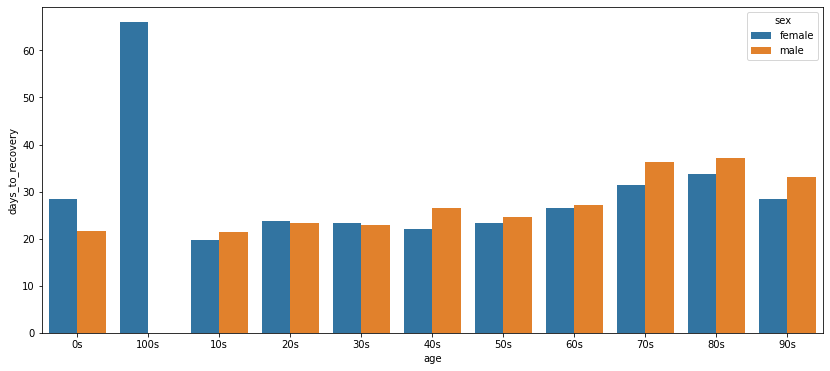

In [17]:
recovery_data = df_pinfo.groupby(['age', 'sex'])['days_to_recovery']\
.mean().dropna().reset_index().rename_axis()
plt.figure(figsize=(14, 6))
sns.barplot(x='age', y='days_to_recovery', hue='sex', data=recovery_data);

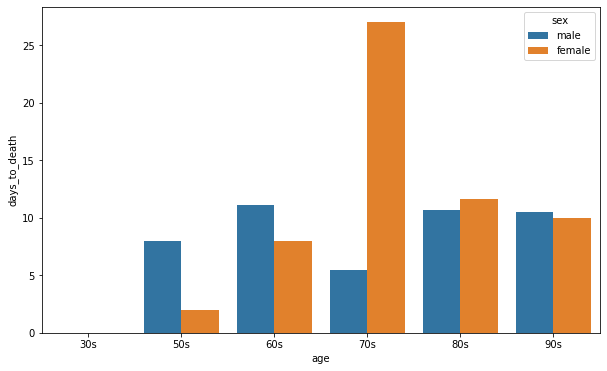

In [18]:
death_data = df_pinfo.groupby(['age', 'sex'])['days_to_death']\
.mean().dropna().reset_index().rename_axis()
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='days_to_death',hue='sex', data=death_data);

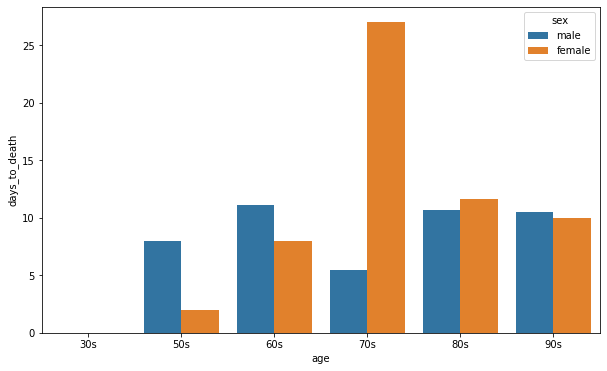

In [19]:
death_data = df_pinfo.groupby(['age', 'sex'])['days_to_death']\
.mean().dropna().reset_index().rename_axis()
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='days_to_death',hue='sex', data=death_data);

## Time 데이터 분석 및 시각화

대한민국의 COVID-19 현황 시계열 데이터

https://drive.google.com/file/d/1HsirjgP298r-WSswAOCdzZAEXqrugjj_/view?usp=drive_link

- date: YYYY-MM-DD
- time: 시간 (0 = AM 12:00 / 16 = PM 04:00)
  > - 3월 2일부터 KCDC 정보 오픈 시간이 PM 04:00에서 AM 12:00로 변경
- test: 누적된 검사자 수
  > - 코로나 감염을 진단하는 검사
- negative: 누적된 음성판별자 수
- confirmed: 누적된 확진자 수
- released: 누적된 격리해제자 수
- deceased: 누적된 사망자 수


In [27]:
df_time = pd.read_csv('Time.csv')
df_time = df_time.set_index('date')
df_time.drop(['time'], axis=1, inplace=True)
df_time.head()

,test,negative,confirmed,released,deceased
date,,,,,
2020-01-20,1,0,1,0,0
2020-01-21,1,0,1,0,0
2020-01-22,4,3,1,0,0
2020-01-23,22,21,1,0,0
2020-01-24,27,25,2,0,0


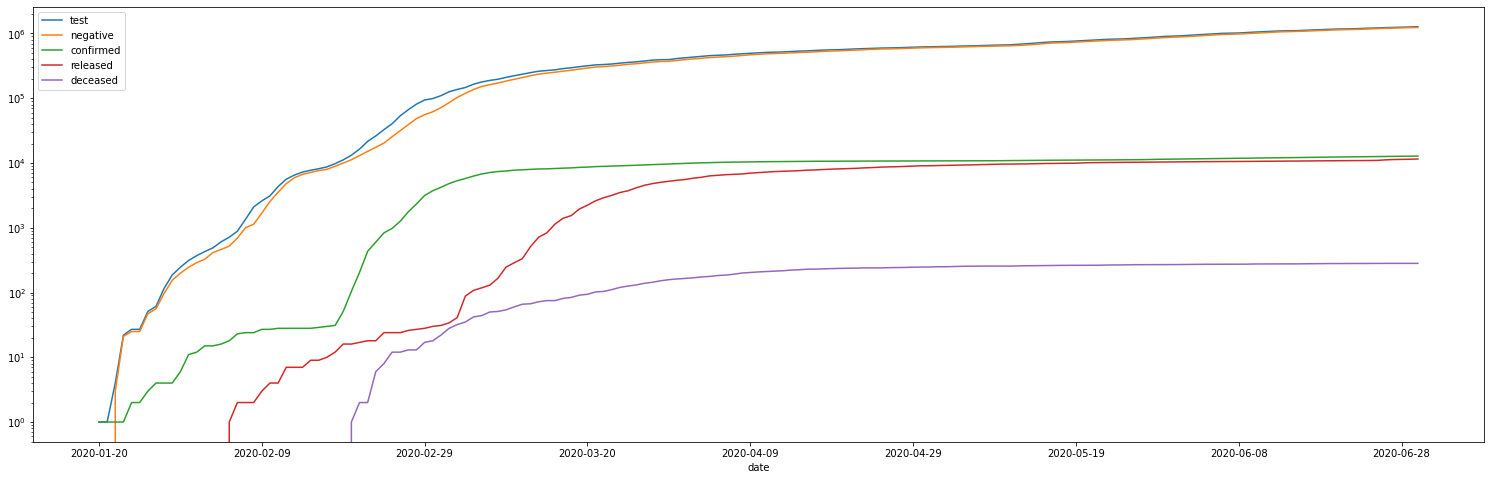

In [28]:
df_time.plot(figsize=(26, 8), logy=True);


## TimeAge 데이터

대한민국의 연령별 COVID-19 현황 시계열 데이터

https://drive.google.com/file/d/1LzBiTv5JazF0k-cBv3VyY7dq-JbT4Qed/view?usp=drive_link

- date: YYYY-MM-DD
  > - 3월 2일부터 연령별 현황이 제시
- time: 시간
- age: 환자의 연령
- confirmed: 누적된 확진자 수
- deceased: 누적된 사망자 수


In [21]:
df_age = pd.read_csv('TimeAge.csv')
df_age = df_age.set_index('date')
df_age.head(10)

,time,age,confirmed,deceased
date,,,,
2020-03-02,0,0s,32,0
2020-03-02,0,10s,169,0
2020-03-02,0,20s,1235,0
2020-03-02,0,30s,506,1
2020-03-02,0,40s,633,1
2020-03-02,0,50s,834,5
2020-03-02,0,60s,530,6
2020-03-02,0,70s,192,6
2020-03-02,0,80s,81,3


In [25]:
df_age_confirmed = df_age.pivot(columns='age', values='confirmed')
df_age_confirmed


age,0s,10s,20s,30s,40s,50s,60s,70s,80s
date,,,,,,,,,
2020-03-02,32,169,1235,506,633,834,530,192,81
2020-03-03,34,204,1417,578,713,952,597,224,93
2020-03-04,34,233,1575,631,790,1051,646,260,108
2020-03-05,38,257,1727,659,847,1127,699,288,124
2020-03-06,45,292,1877,693,889,1217,763,340,168
...,...,...,...,...,...,...,...,...,...
2020-06-26,184,698,3317,1463,1651,2264,1633,839,553
2020-06-27,185,700,3331,1473,1657,2269,1640,843,555
2020-06-28,187,703,3343,1485,1667,2275,1653,846,556


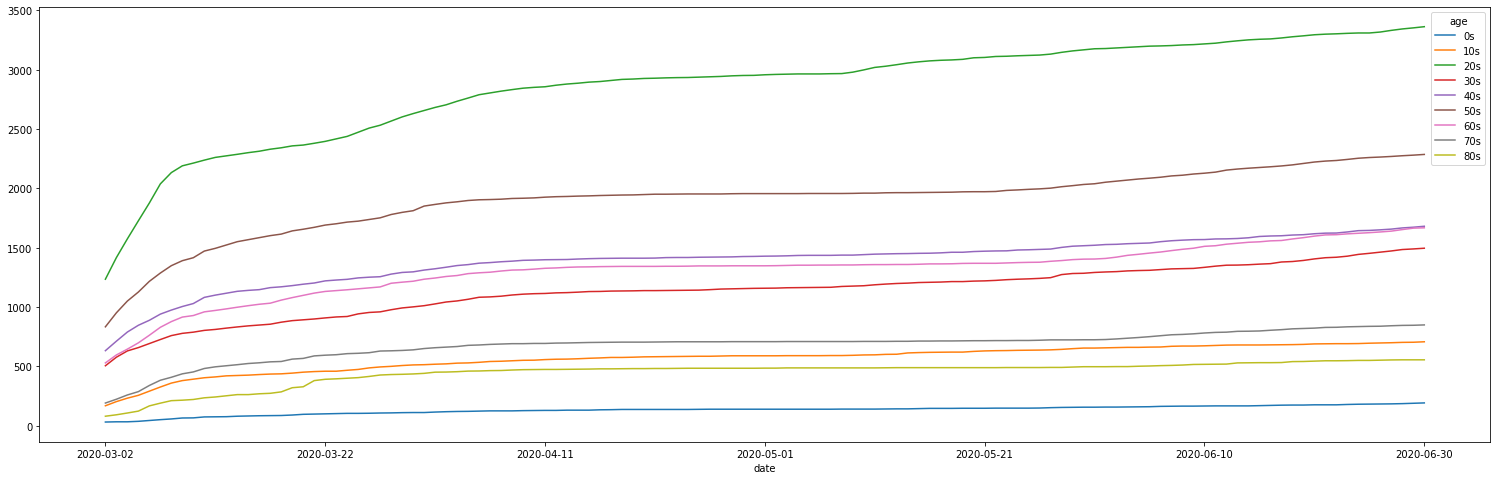

In [29]:
df_age_confirmed.plot(figsize=(26, 8));

In [23]:
df_age_deceased = df_age.pivot(columns='age', values='deceased')
df_age_deceased


age,0s,10s,20s,30s,40s,50s,60s,70s,80s
date,,,,,,,,,
2020-03-02,0,0,0,1,1,5,6,6,3
2020-03-03,0,0,0,1,1,5,7,9,5
2020-03-04,0,0,0,1,1,5,7,12,6
2020-03-05,0,0,0,1,1,5,8,13,7
2020-03-06,0,0,0,1,1,5,11,14,10
...,...,...,...,...,...,...,...,...,...
2020-06-26,0,0,0,2,3,15,41,82,139
2020-06-27,0,0,0,2,3,15,41,82,139
2020-06-28,0,0,0,2,3,15,41,82,139


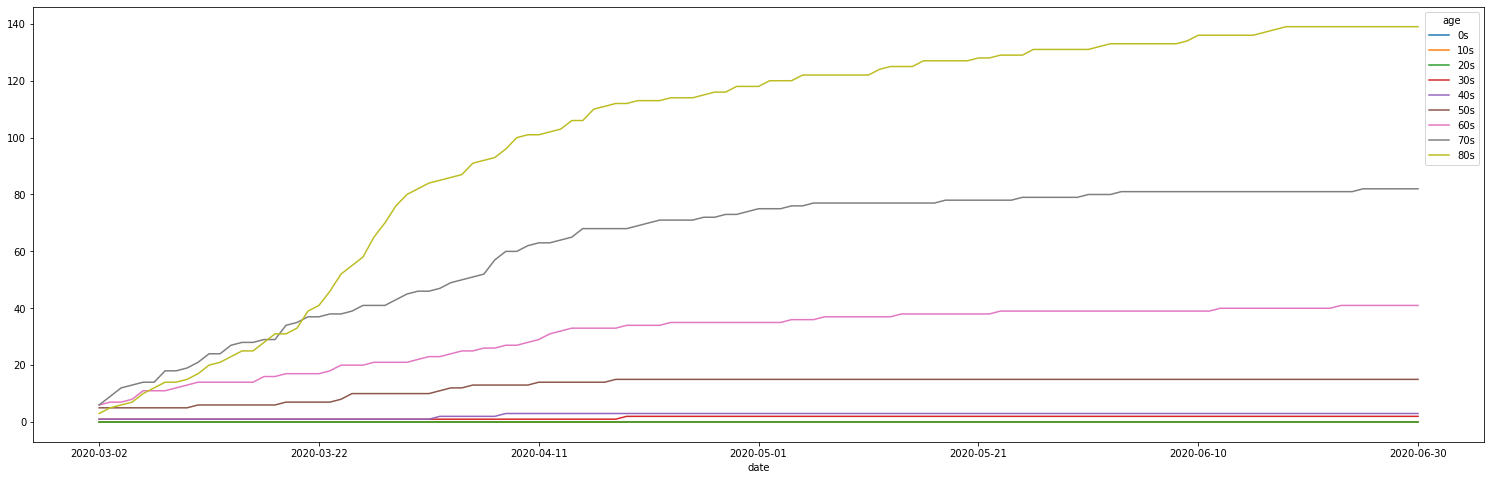

In [30]:
df_age_deceased.plot(figsize=(26, 8));

## TimeGender 데이터 분석 및 시각화

대한민국의 성별 기준 COVID-19 현황 시계열 데이터

https://drive.google.com/file/d/1p6VJeBWFPQwu5KAkPudgYFS1RVi1RPIz/view?usp=drive_link

- date: YYYY-MM-DD
  > - 성별에 대한 현황은 3월 2일부터 제시
- time: 시간
- sex: 환자의 성별
- confirmed: 누적된 확진자 수
- deceased: 누적된 사망자 수


In [32]:
df_gender = pd.read_csv('TimeGender.csv')
df_gender = df_gender.set_index('date')
df_gender.head()

,time,sex,confirmed,deceased
date,,,,
2020-03-02,0,male,1591,13
2020-03-02,0,female,2621,9
2020-03-03,0,male,1810,16
2020-03-03,0,female,3002,12
2020-03-04,0,male,1996,20


In [33]:
df_gender_confirmed = df_gender.pivot(columns='sex', values='confirmed')
df_gender_confirmed

sex,female,male
date,,
2020-03-02,2621,1591
2020-03-03,3002,1810
2020-03-04,3332,1996
2020-03-05,3617,2149
2020-03-06,3939,2345
...,...,...
2020-06-26,7218,5384
2020-06-27,7241,5412
2020-06-28,7265,5450


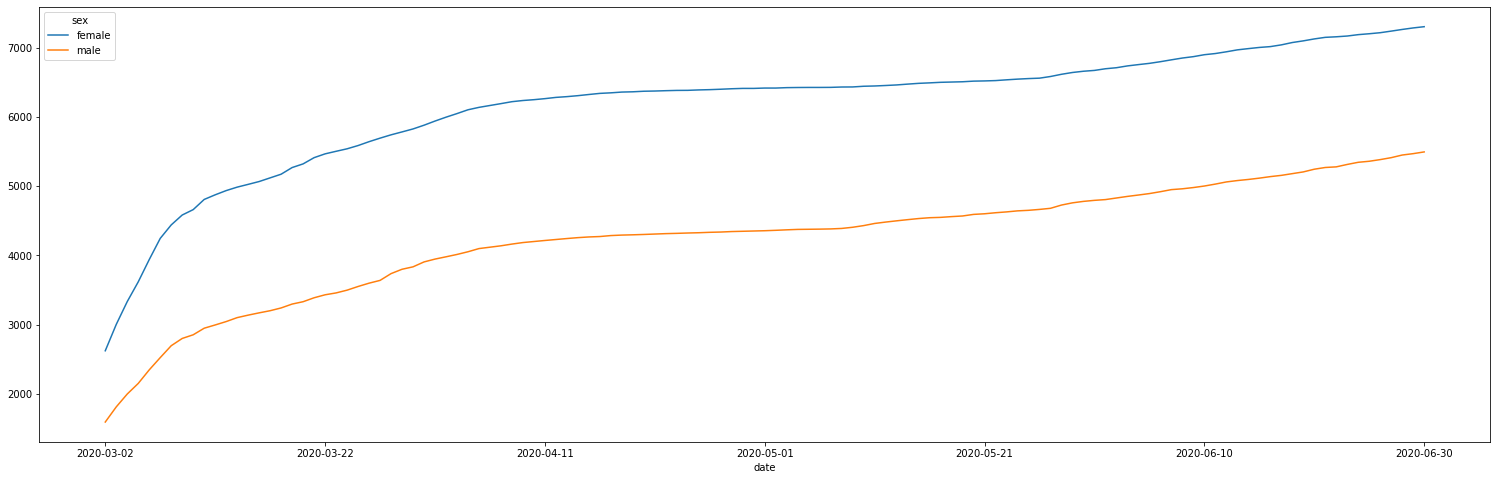

In [34]:
df_gender_confirmed.plot(figsize=(26, 8));


In [35]:
df_gender_deceased = df_gender.pivot(columns='sex', values='deceased')
df_gender_deceased

sex,female,male
date,,
2020-03-02,9,13
2020-03-03,12,16
2020-03-04,12,20
2020-03-05,14,21
2020-03-06,17,25
...,...,...
2020-06-26,131,151
2020-06-27,131,151
2020-06-28,131,151


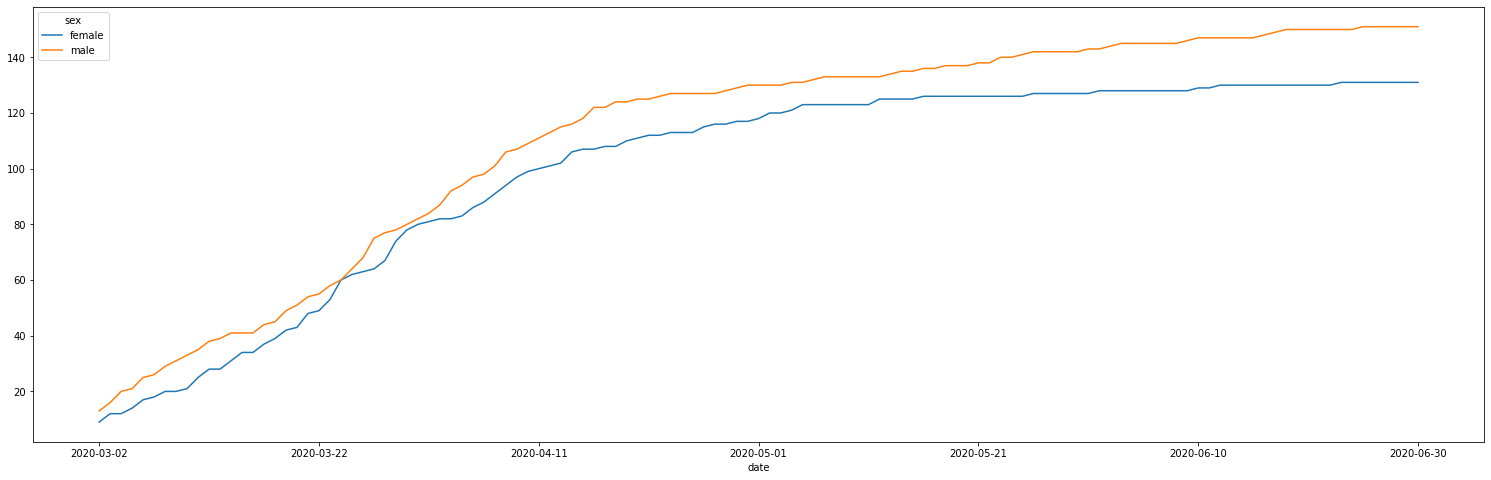

In [36]:
df_gender_deceased.plot(figsize=(26, 8));

## TimeProvince 데이터 분석 및 시각화

대한민국의 COVID-19 현황 시계열 데이터

https://drive.google.com/file/d/1NYQubTRAAhhpvMyUOKPB1CZCdOr3pUnS/view?usp=drive_link

- date: YYYY-MM-DD
- time: 시간
- province: 대한민국 도
- confirmed: 도내 누적 확진자 건수
  > - 지방별로 확인된 현황은 지난 2월 21일부터 제시
  > - 2월 21일 이전의 값은 다를 수 있음
- released: 도내 누적 격리해제 건수
  > - 지방별로 확정된 현황은 지난 3월 5일부터 제시
  > - 3월 5일 이전의 값은 다를 수 있음
- deceased: 도내 누적 사망자 수
  > - 지방별로 확정된 현황은 지난 3월 5일부터 제시
  > - 3월 5일 이전의 값은 다를 수 있음

In [38]:
df_province = pd.read_csv('TimeProvince.csv')
df_province = df_province.set_index('date')
df_province.head()


,time,province,confirmed,released,deceased
date,,,,,
2020-01-20,16,Seoul,0,0,0
2020-01-20,16,Busan,0,0,0
2020-01-20,16,Daegu,0,0,0
2020-01-20,16,Incheon,1,0,0
2020-01-20,16,Gwangju,0,0,0


In [39]:
df_province_confirmed = df_province.pivot(columns='province', values='confirmed')
df_province_confirmed

province,Busan,Chungcheongbuk-do,Chungcheongnam-do,Daegu,Daejeon,Gangwon-do,Gwangju,Gyeonggi-do,Gyeongsangbuk-do,Gyeongsangnam-do,Incheon,Jeju-do,Jeollabuk-do,Jeollanam-do,Sejong,Seoul,Ulsan
date,,,,,,,,,,,,,,,,,
2020-01-20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-21,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-22,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,152,62,166,6903,102,64,33,1150,1387,133,336,19,25,20,49,1267,55
2020-06-27,152,63,166,6904,104,64,33,1167,1387,133,337,19,26,20,49,1284,55
2020-06-28,152,64,167,6904,110,64,37,1184,1387,133,337,19,26,23,49,1298,55


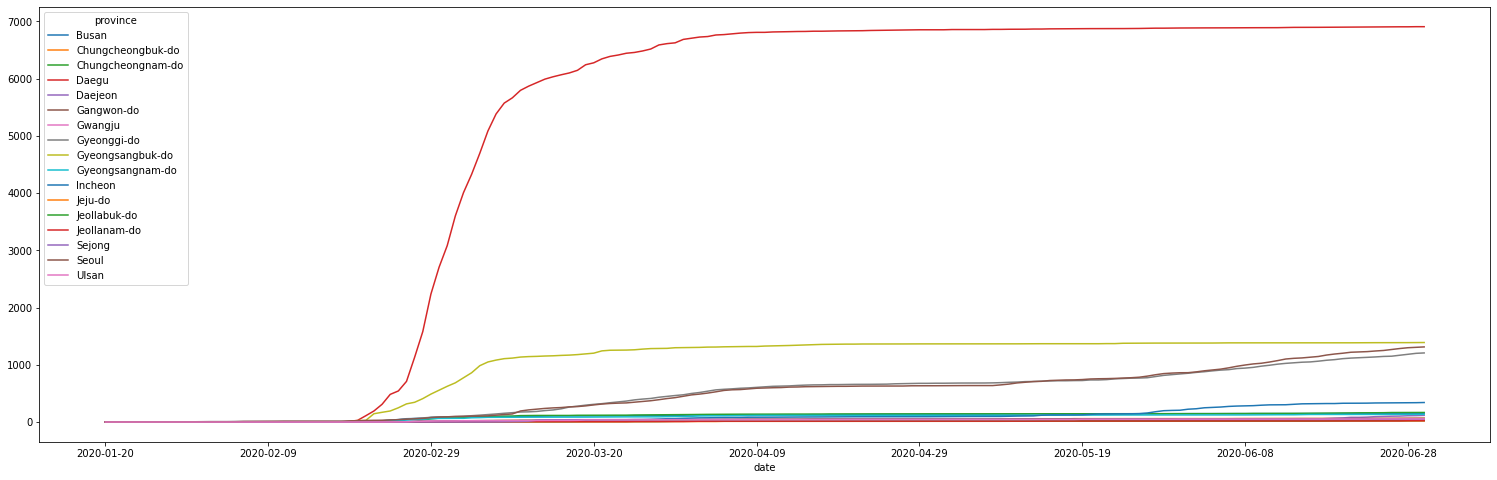

In [40]:
df_province_confirmed.plot(figsize=(26, 8));

In [41]:
df_province_released = df_province.pivot(columns='province', values='released')
df_province_released

province,Busan,Chungcheongbuk-do,Chungcheongnam-do,Daegu,Daejeon,Gangwon-do,Gwangju,Gyeonggi-do,Gyeongsangbuk-do,Gyeongsangnam-do,Incheon,Jeju-do,Jeollabuk-do,Jeollanam-do,Sejong,Seoul,Ulsan
date,,,,,,,,,,,,,,,,,
2020-01-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,142,60,148,6695,44,52,32,814,1327,125,231,16,20,18,47,843,49
2020-06-27,142,60,148,6700,44,52,32,858,1328,128,250,16,20,19,47,911,50
2020-06-28,143,60,148,6700,44,53,32,873,1328,128,264,16,21,19,47,923,50


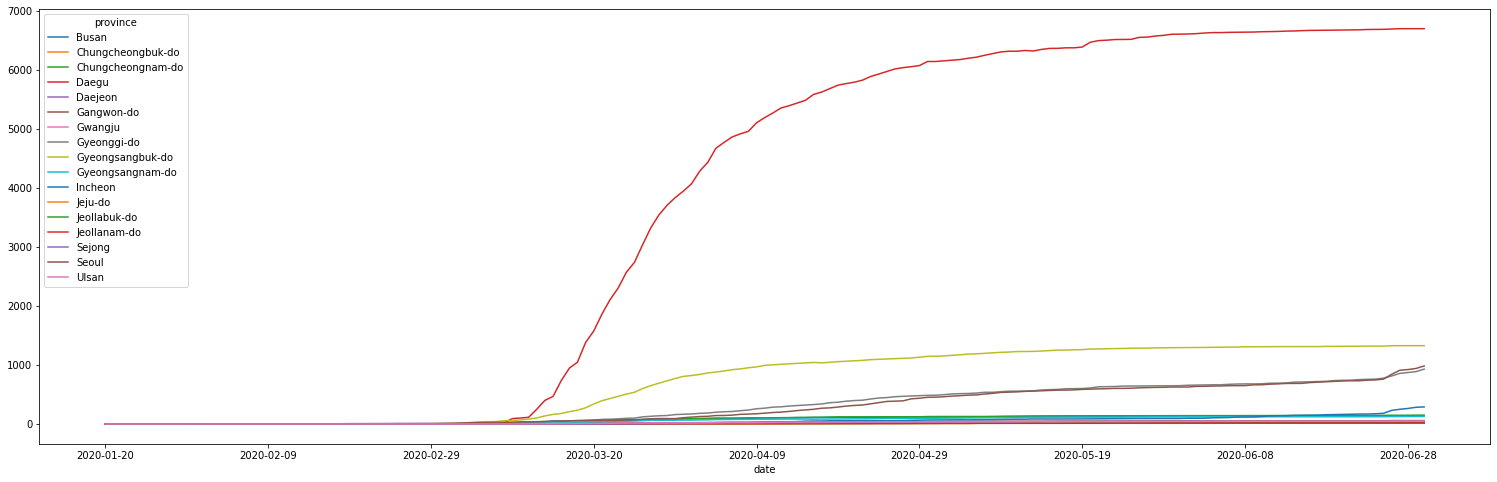

In [42]:
df_province_released.plot(figsize=(26, 8));

In [43]:
df_province_deceased = df_province.pivot(columns='province', values='deceased')
df_province_deceased

province,Busan,Chungcheongbuk-do,Chungcheongnam-do,Daegu,Daejeon,Gangwon-do,Gwangju,Gyeonggi-do,Gyeongsangbuk-do,Gyeongsangnam-do,Incheon,Jeju-do,Jeollabuk-do,Jeollanam-do,Sejong,Seoul,Ulsan
date,,,,,,,,,,,,,,,,,
2020-01-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,3,0,0,189,1,3,0,23,54,0,1,0,0,0,0,7,1
2020-06-27,3,0,0,189,1,3,0,22,54,0,2,0,0,0,0,7,1
2020-06-28,3,0,0,189,1,3,0,23,54,0,1,0,0,0,0,7,1


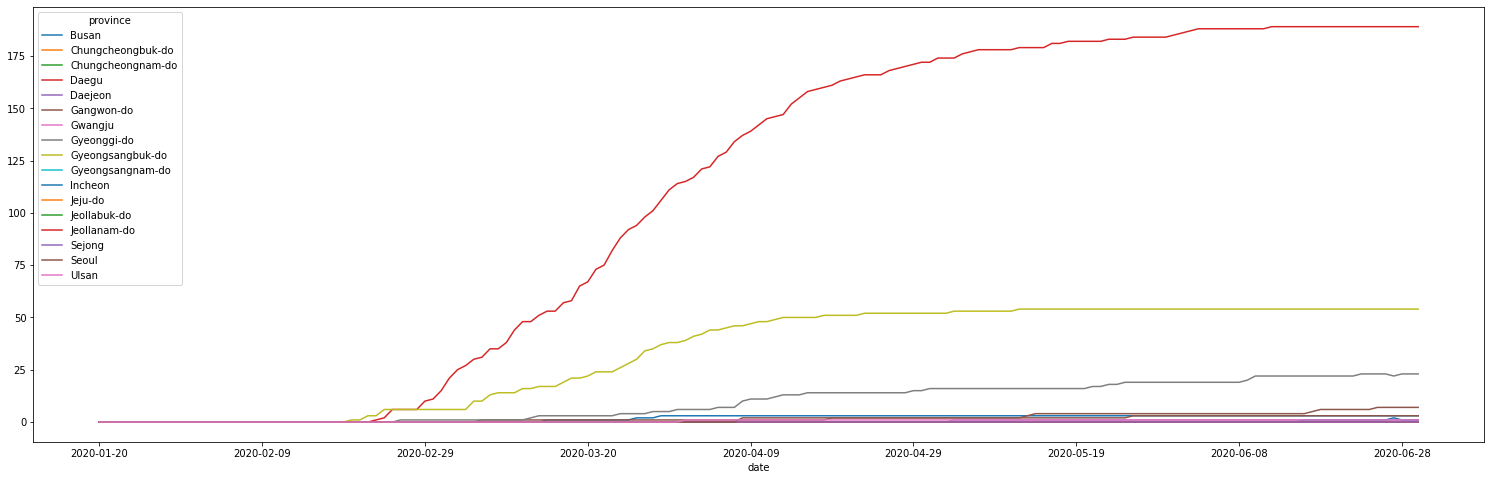

In [44]:
df_province_deceased.plot(figsize=(26, 8));


## Region 데이터 분석 및 시각화

대한민국의 지역위치 및 통계자료

https://drive.google.com/file/d/18bAB2rwLbj-vueKbifRsNPn2ouo5TEfB/view?usp=drive_link
- code: 지역 코드
- province: 특별시/광역시/도(도)
- city: 시(-si) / 군(-gun) / 구(-gu)
- latitude: 위도(WGS84)
- longitude: 경도(WGS84)
- elementary_school_count: 초등학교 수
- kindergarten_count: 유치원 수
- university_count: 대학교 수
- academy_ratio: 학원 비율
- elderly_population_ratio: 노인 인구 비율
- elderly_alone_ratio: 독거노인 가구 비율
- nursing_home_count: 요양원 수

* 출처: KOSTAT (통계청)

In [46]:
df_region = pd.read_csv('Region.csv')
df_region.head()


,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [48]:
df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      244 non-null    int64  
 1   province                  244 non-null    object 
 2   city                      244 non-null    object 
 3   latitude                  244 non-null    float64
 4   longitude                 244 non-null    float64
 5   elementary_school_count   244 non-null    int64  
 6   kindergarten_count        244 non-null    int64  
 7   university_count          244 non-null    int64  
 8   academy_ratio             244 non-null    float64
 9   elderly_population_ratio  244 non-null    float64
 10  elderly_alone_ratio       244 non-null    float64
 11  nursing_home_count        244 non-null    int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 23.0+ KB


In [47]:
import folium ## colab 기반이라 지역데이터 시각화가 안됨
from folium.plugins import HeatMap
southkorea_map = folium.Map(location=[36.55,126.983333 ], zoom_start=7)
heatmap = HeatMap(zip(df_region['latitude'], df_region['longitude']),
                  min_opacity=0.1, max_val=5, max_zoom=5,
                  radius=10, blur=15).add_to(southkorea_map)

southkorea_map.add_child(heatmap)
southkorea_map

In [49]:
southkorea_map = folium.Map(location=[36.55,126.983333 ], zoom_start=7)
for lat, lon, city in zip(df_region['latitude'], df_region['longitude'], df_region['city']):
    folium.CircleMarker([lat, lon], radius=3, color='purple',
                        popup =('City: ' + str(city) + '<br>'),
                        fill_color='purple', fill_opacity= 0.3).add_to(southkorea_map)
southkorea_map

## Case 데이터 분석 및 시각화

대한민국의 COVID-19 감염 사례 자료

https://drive.google.com/file/d/1c_xS8t9QNTxslYhekbXX4PJ8usXPR1iW/view?usp=drive_link

- case_id: 감염 사례 ID
  > - case_id(7) = region_code(5) + case_number(2)  
  > - region_code는 'Region.csv' 파일에서 확인 가능
- province: 특별시 / 광역시 / 도(-do)
- city: 시(-si) / 군(-gun) / 구(-gu)
  > - 'from other city'값은 집단 감염이 시작된 곳이 다른 도시라는 것을 의미
- group: TRUE: 그룹 감염 / FALSE: 그룹 감염 아님
  > - 이 값이 'TRUE'이면 'infection_cases' 값은 그룹의 이름을 의미 
  > - 'contact with patient', 'overseas inflow' 그리고 'etc'는 그룹 감염이 아님을 의미
- infection_case: 감염 사례(그룹명 또는 기타 사례명)
  > - 'overseas inflow' 값은 다른 나라에서 감염되었음을 의미
  > - 'etc' 값에는 개별 사례, 조사 후 관련성 분류가 진행 중인 사례, 조사 중인 사례가 포함
- confirmed: 누적된 확진자 수 
- latitude: 그룹의 위도 (WGS84)
- longitude: 그룹의 경도 (WGS84)


In [51]:
df_case = pd.read_csv('Case.csv')
df_case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [52]:
df_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0    case_id        174 non-null    int64 
 1   province        174 non-null    object
 2   city            174 non-null    object
 3   group           174 non-null    bool  
 4   infection_case  174 non-null    object
 5   confirmed       174 non-null    int64 
 6   latitude        174 non-null    object
 7   longitude       174 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 9.8+ KB


In [53]:
import numpy as np
df_case["latitude"] = df_case["latitude"].str.replace(pat=r'-', repl=r'0', regex=True)
df_case["longitude"] = df_case["longitude"].str.replace(pat=r'-', repl=r'0', regex=True)

In [54]:
df_case['latitude'] = df_case['latitude'].astype(float)
df_case['longitude'] = df_case['longitude'].astype(float)


In [55]:
southkorea_map = folium.Map(location=[36.55,126.983333 ], zoom_start=7)
for lat, lon, city, infection_case, confirmed in zip(df_case['latitude'], 
                                                     df_case['longitude'], 
   df_case['city'], 
   df_case['infection_case'], 
   df_case['confirmed']):
    folium.CircleMarker([lat, lon], radius=confirmed*0.01, color='purple',
                        popup=('City: ' + str(city) + '<br>' + 'Infection Case: '
                         + str(infection_case) + '<br>'), 
                        fill_color='purple', fill_opacity= 0.3).add_to(southkorea_map)
southkorea_map

## SearchTrend 데이터 분석 및 시각화

국내 최대 포털 네이버에서 검색된 키워드 동향 데이터

https://drive.google.com/file/d/191jDI8zAYRu6g7wHr8oeJuPp9lfELXZg/view?usp=drive_link

- date: YYYY-MM-DD
- cold: 한국어 'cold'의 검색량
  > - 기간 중 가장 높은 검색량을 100으로 설정한 상대값을 의미
- flu: 한국어 'flu'의 검색량
  > - 기간 중 가장 높은 검색량을 100으로 설정한 상대값을 의미
- pneumonia: 한국어 'pneumonia'의 검색량
  > - 기간 중 가장 높은 검색량을 100으로 설정한 상대값을 의미
- coronavirus: 한국어 'coronavirus'의 검색량
  > - 기간 중 가장 높은 검색량을 100으로 설정한 상대값을 의미

데이터 출처: [NAVER DataLab](https://datalab.naver.com/)

In [57]:
df_search_trend = pd.read_csv('SearchTrend.csv')
df_search_trend = df_search_trend.set_index('date')
df_search_trend.head()


,cold,flu,pneumonia,coronavirus
date,,,,
2016-01-01,0.11663,0.05590,0.15726,0.00736
2016-01-02,0.13372,0.17135,0.20826,0.00890
2016-01-03,0.14917,0.22317,0.19326,0.00845
2016-01-04,0.17463,0.18626,0.29008,0.01145
2016-01-05,0.17226,0.15072,0.24562,0.01381


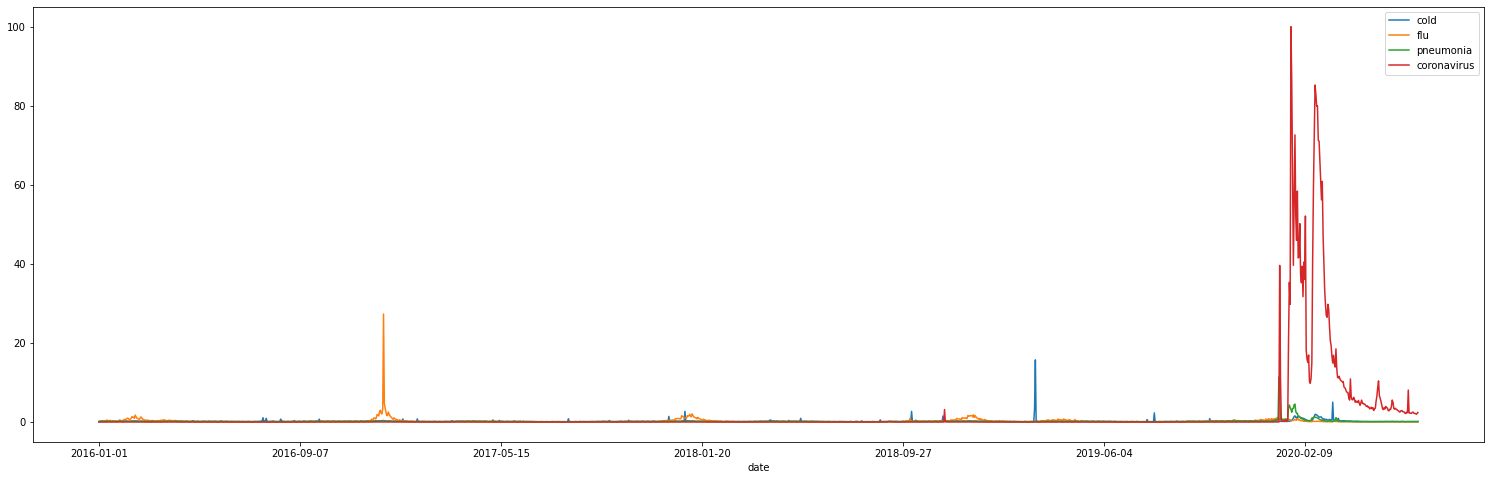

In [58]:
df_search_trend.plot(figsize=(26, 8));
